<a href="https://www.kaggle.com/code/vtrackstar/linkedin-machine-learning-practice-lin-regr?scriptVersionId=208701434" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/linkedinpracticeml/vehicles.csv
/kaggle/input/linkedinpracticeml/students.xlsx
/kaggle/input/linkedinpracticeml/washers.csv
/kaggle/input/linkedinpracticeml/brics.csv
/kaggle/input/linkedinpracticeml/bikes.csv


## Data Exploration

In [2]:
members = ['Brazil', 'Russia', 'India', 'China', 'South Africa']
brics1 = pd.Series(members)
brics1

0          Brazil
1          Russia
2           India
3           China
4    South Africa
dtype: object

In [3]:
type(brics1)

pandas.core.series.Series

In [4]:
members = {"country": ["Brazil", "Russia", "India", "China", "South Africa"],
        "capital": ["Brasilia", "Moscow", "New Delhi", "Beijing", "Pretoria"],
        "gdp": [2750, 1658, 3202, 15270, 370],
        "literacy":[.944, .997, .721, .964, .943],
        "expectancy": [76.8, 72.7, 68.8, 76.4, 63.6],
        "population": [210.87, 143.96, 1367.09, 1415.05, 57.4]}
brics2 = pd.DataFrame(members)
brics2

,country,capital,gdp,literacy,expectancy,population
0,Brazil,Brasilia,2750,0.944,76.8,210.87
1,Russia,Moscow,1658,0.997,72.7,143.96
2,India,New Delhi,3202,0.721,68.8,1367.09
3,China,Beijing,15270,0.964,76.4,1415.05
4,South Africa,Pretoria,370,0.943,63.6,57.40


In [5]:
type(brics2)

pandas.core.frame.DataFrame

In [6]:
members = [["Brazil", "Brasilia", 2750, 0.944, 76.8, 210.87],
                     ["Russia", "Moscow", 1658, 0.997, 72.7, 143.96],
                     ["India", "New Delhi", 3202, 0.721, 68.8, 1367.09],
                     ["China", "Beijing", 15270, 0.964, 76.4, 1415.05],
                     ["South Africa", "Pretoria", 370, 0.943, 63.6, 57.4]]
labels = ["country", "capital", "gdp", "literacy", "expectancy", "population"]
brics3 = pd.DataFrame(members, columns = labels)
brics3

,country,capital,gdp,literacy,expectancy,population
0,Brazil,Brasilia,2750,0.944,76.8,210.87
1,Russia,Moscow,1658,0.997,72.7,143.96
2,India,New Delhi,3202,0.721,68.8,1367.09
3,China,Beijing,15270,0.964,76.4,1415.05
4,South Africa,Pretoria,370,0.943,63.6,57.40


In [7]:
brics4 = pd.read_csv('/kaggle/input/linkedinpracticeml/brics.csv')
brics4

,country,capital,gdp,literacy,expectancy,population
0,Brazil,Brasilia,2750,0.944,76.8,210.87
1,Russia,Moscow,1658,0.997,72.7,143.96
2,India,New Delhi,3202,0.721,68.8,1367.09
3,China,Beijing,15270,0.964,76.4,1415.05
4,South Africa,Pretoria,370,0.943,63.6,57.40


In [8]:
washers = pd.read_csv('/kaggle/input/linkedinpracticeml/washers.csv')
print(washers.info())
print(washers.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             261 non-null    int64  
 1   BrandName      261 non-null    object 
 2   ModelNumber    261 non-null    object 
 3   UPC            261 non-null    object 
 4   Configuration  261 non-null    object 
 5   Features       202 non-null    object 
 6   Market         261 non-null    object 
 7   Volume         261 non-null    float64
 8   IMEF           261 non-null    float64
 9   MinimumIMEF    261 non-null    float64
 10  EnergyUse      261 non-null    int64  
 11  IWF            261 non-null    float64
 12  MaximumIWF     261 non-null    float64
 13  WaterUse       261 non-null    int64  
 14  DateAvailable  261 non-null    object 
 15  DateCertified  261 non-null    object 
 16  Countries      261 non-null    object 
 17  MostEfficient  261 non-null    object 
dtypes: float64

In [9]:
washers[['BrandName']].describe()

,BrandName
count,261
unique,22
top,LG
freq,50


In [10]:
washers[['Volume']].describe()

,Volume
count,261.000000
mean,4.374713
std,0.965866
min,1.900000
25%,4.300000
50%,4.500000
75%,5.000000
max,6.200000


In [11]:
washers[['BrandName']].value_counts()

BrandName      
LG                 50
GE                 49
Samsung            47
Kenmore            30
Whirlpool          26
Maytag             18
Electrolux          7
Bosch               4
Miele               4
Asko                4
Beko                3
Blomberg            3
Crosley             3
Midea               2
Magic Chef          2
Amana               2
Fisher & Paykel     2
Insignia            1
Inglis              1
Gaggenau            1
GE Adora            1
Haier               1
Name: count, dtype: int64

In [12]:
washers[['BrandName']].value_counts(normalize=True)

BrandName      
LG                 0.191571
GE                 0.187739
Samsung            0.180077
Kenmore            0.114943
Whirlpool          0.099617
Maytag             0.068966
Electrolux         0.026820
Bosch              0.015326
Miele              0.015326
Asko               0.015326
Beko               0.011494
Blomberg           0.011494
Crosley            0.011494
Midea              0.007663
Magic Chef         0.007663
Amana              0.007663
Fisher & Paykel    0.007663
Insignia           0.003831
Inglis             0.003831
Gaggenau           0.003831
GE Adora           0.003831
Haier              0.003831
Name: proportion, dtype: float64

In [13]:
washers[['Volume']].mean()

Volume    4.374713
dtype: float64

In [14]:
washers.groupby('BrandName')[['Volume']].mean()

,Volume
BrandName,
Amana,4.250000
Asko,2.525000
Beko,2.133333
Blomberg,2.300000
Bosch,2.200000
Crosley,4.400000
Electrolux,3.785714
Fisher & Paykel,2.400000
GE,4.328571


In [15]:
washers.groupby('BrandName')[['Volume']].mean().sort_values(by='Volume')

,Volume
BrandName,
Beko,2.133333
Gaggenau,2.200000
Bosch,2.200000
Miele,2.300000
Blomberg,2.300000
Fisher & Paykel,2.400000
Haier,2.400000
Asko,2.525000
Magic Chef,2.700000


In [16]:
washers.groupby('BrandName')[['Volume']].agg(['mean', 'median', 'min', 'max'])

Volume                 
                     mean median  min  max
BrandName                                 
Amana            4.250000   4.25  4.2  4.3
Asko             2.525000   2.70  2.0  2.7
Beko             2.133333   2.00  1.9  2.5
Blomberg         2.300000   2.50  1.9  2.5
Bosch            2.200000   2.20  2.2  2.2
Crosley          4.400000   4.50  4.2  4.5
Electrolux       3.785714   4.30  2.4  4.4
Fisher & Paykel  2.400000   2.40  2.4  2.4
GE               4.328571   4.50  2.2  5.2
GE Adora         4.200000   4.20  4.2  4.2
Gaggenau         2.200000   2.20  2.2  2.2
Haier            2.400000   2.40  2.4  2.4
Inglis           4.300000   4.30  4.3  4.3
Insignia         4.800000   4.80  4.8  4.8
Kenmore          4.796667   4.80  2.4  6.2
LG               4.596000   4.50  2.3  5.8
Magic Chef       2.700000   2.70  2.7  2.7
Maytag           4.988889   4.90  4.4  6.2
Midea            5.200000   5.20  5.2  5.2
Miele            2.300000   2.30  2.3  2.3
Samsung          4.729787   4.80  2.2  5.6
Whirlpool        4.453846   4.50  2.0  5.3

## Visualizing Data

In [17]:
vehicles = pd.read_csv('/kaggle/input/linkedinpracticeml/vehicles.csv')
vehicles.head()

,citympg,cylinders,displacement,drive,highwaympg,make,model,class,year,transmissiontype,transmissionspeeds,co2emissions
0,14.0,6,4.1,2-Wheel Drive,19.0,Buick,Electra/Park Avenue,Large Cars,1984,Automatic,4,555.437500
1,14.0,8,5.0,2-Wheel Drive,20.0,Buick,Electra/Park Avenue,Large Cars,1984,Automatic,4,555.437500
2,18.0,8,5.7,2-Wheel Drive,26.0,Buick,Electra/Park Avenue,Large Cars,1984,Automatic,4,484.761905
3,21.0,6,4.3,Rear-Wheel Drive,31.0,Cadillac,Fleetwood/DeVille (FWD),Large Cars,1984,Automatic,4,424.166667
4,14.0,8,4.1,Rear-Wheel Drive,19.0,Cadillac,Brougham/DeVille (RWD),Large Cars,1984,Automatic,4,555.437500


<Axes: xlabel='citympg', ylabel='co2emissions'>

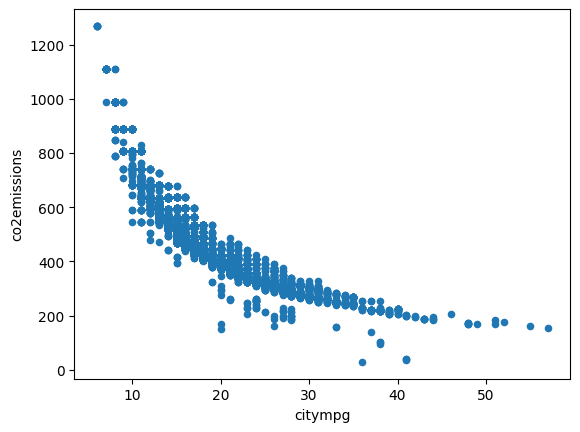

In [18]:
## Relationship Visualization
vehicles.plot(kind='scatter', x='citympg', y='co2emissions')

<Axes: ylabel='Frequency'>

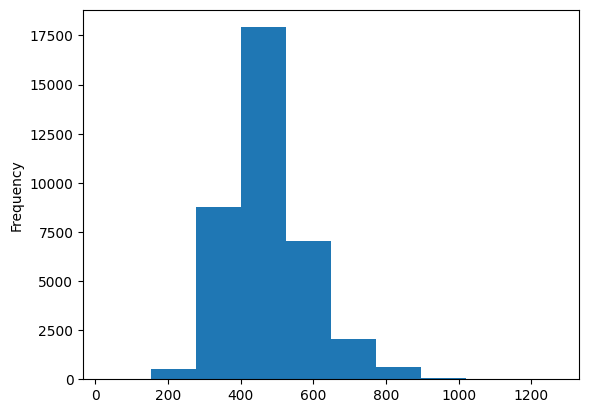

In [19]:
## Distribution Visualization
vehicles['co2emissions'].plot(kind='hist')

In [20]:
## Comparison Visualization
vehicles.pivot(columns='drive', values='co2emissions')

drive,2-Wheel Drive,4-Wheel Drive,All-Wheel Drive,Front-Wheel Drive,Rear-Wheel Drive
0,555.437500,NaN,NaN,NaN,NaN
1,555.437500,NaN,NaN,NaN,NaN
2,484.761905,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,424.166667
4,NaN,NaN,NaN,NaN,555.437500
...,...,...,...,...,...
36974,NaN,NaN,NaN,NaN,442.000000
36975,NaN,NaN,NaN,NaN,466.000000
36976,NaN,NaN,NaN,NaN,503.000000
36977,NaN,NaN,NaN,NaN,661.000000


<Axes: >

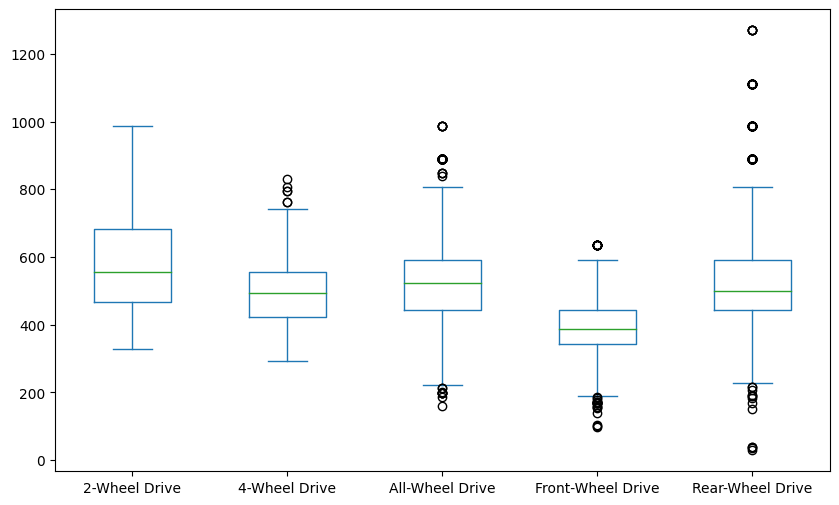

In [21]:
vehicles.pivot(columns='drive', values='co2emissions').plot(kind='box', figsize=(10,6))

In [22]:
## Composition Visualization
vehicles.groupby('year')['drive'].value_counts()

year  drive            
1984  2-Wheel Drive        477
      All-Wheel Drive      301
      Rear-Wheel Drive       4
1985  Rear-Wheel Drive     772
      Front-Wheel Drive    672
                          ... 
2017  4-Wheel Drive        173
2018  All-Wheel Drive      245
      Rear-Wheel Drive     230
      Front-Wheel Drive    193
      4-Wheel Drive        124
Name: count, Length: 123, dtype: int64

In [23]:
vehicles.groupby('year')['drive'].value_counts().unstack()

drive,2-Wheel Drive,4-Wheel Drive,All-Wheel Drive,Front-Wheel Drive,Rear-Wheel Drive
year,,,,,
1984,477.0,NaN,301.0,NaN,4.0
1985,NaN,NaN,255.0,672.0,772.0
1986,NaN,1.0,202.0,430.0,576.0
1987,NaN,NaN,220.0,470.0,557.0
1988,NaN,NaN,215.0,447.0,468.0
1989,NaN,NaN,227.0,445.0,480.0
1990,NaN,NaN,241.0,422.0,413.0
1991,NaN,NaN,243.0,431.0,456.0
1992,NaN,NaN,232.0,455.0,432.0


<Axes: xlabel='year'>

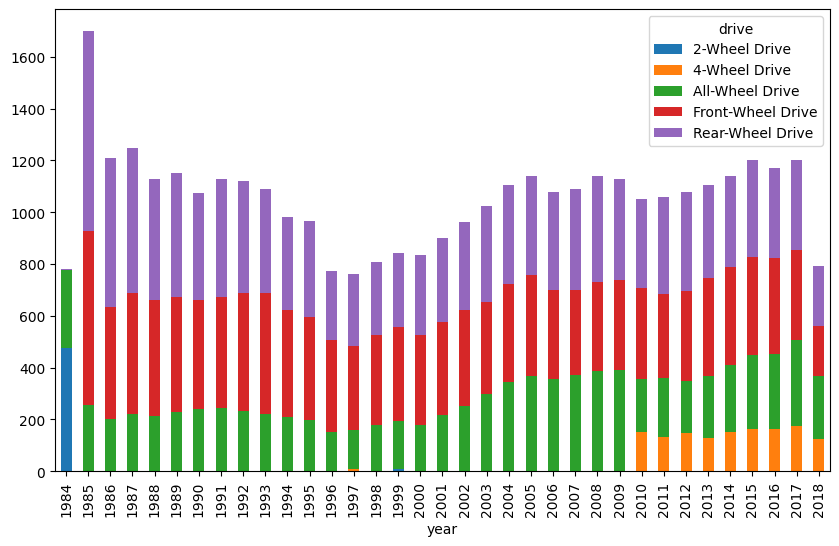

In [24]:
vehicles.groupby('year')['drive'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(10,6))

## Data Preparation

In [25]:
students = pd.read_excel('/kaggle/input/linkedinpracticeml/students.xlsx')
students

,ID,FirstName,LastName,Major,Minor,Age,Gender,City,State,Zip
0,1869,Hana,Barton,Finance,NaN,22.0,Female,NaN,NaN,NaN
1,2010,Alicia,Kanuri,Management,NaN,21.0,Female,Berrien Springs,NaN,NaN
2,2075,Becca,Swanson,Marketing,NaN,22.0,Female,Chicago,IL,60608.0
3,2228,Halima,Aminu,Business Analytics,NaN,20.0,Female,Atlanta,GA,30303.0
4,2442,Holly,Robinson,Finance,NaN,20.0,Female,Charlotte,NC,28202.0
5,2858,Carla,Harding,Accountancy,NaN,NaN,Female,Youngstown,OH,44502.0
6,3459,Alex,Swanson,Accountancy,NaN,NaN,NaN,Granger,IN,NaN
7,3585,Aminah,Zalim,Marketing,NaN,20.0,Female,Ashburn,VA,20147.0
8,5170,Gus,Cunningham,Finance,Innovation,21.0,Male,Massillon,OH,44646.0
9,5317,Rafael,Solis,Business Analytics,ACMS,NaN,NaN,South Bend,IN,46601.0


In [26]:
mask = students['State'].isnull()
mask

0      True
1      True
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13     True
14    False
15    False
16    False
17    False
18    False
19    False
Name: State, dtype: bool

In [27]:
students[mask]

,ID,FirstName,LastName,Major,Minor,Age,Gender,City,State,Zip
0,1869,Hana,Barton,Finance,NaN,22.0,Female,NaN,NaN,NaN
1,2010,Alicia,Kanuri,Management,NaN,21.0,Female,Berrien Springs,NaN,NaN
13,6504,Chantelle,Woods,Business Technology,NaN,18.0,Female,Chicago,NaN,60608.0


In [28]:
students1 = students.dropna(subset=['State', 'Zip'], how='all')
students1

,ID,FirstName,LastName,Major,Minor,Age,Gender,City,State,Zip
2,2075,Becca,Swanson,Marketing,NaN,22.0,Female,Chicago,IL,60608.0
3,2228,Halima,Aminu,Business Analytics,NaN,20.0,Female,Atlanta,GA,30303.0
4,2442,Holly,Robinson,Finance,NaN,20.0,Female,Charlotte,NC,28202.0
5,2858,Carla,Harding,Accountancy,NaN,NaN,Female,Youngstown,OH,44502.0
6,3459,Alex,Swanson,Accountancy,NaN,NaN,NaN,Granger,IN,NaN
7,3585,Aminah,Zalim,Marketing,NaN,20.0,Female,Ashburn,VA,20147.0
8,5170,Gus,Cunningham,Finance,Innovation,21.0,Male,Massillon,OH,44646.0
9,5317,Rafael,Solis,Business Analytics,ACMS,NaN,NaN,South Bend,IN,46601.0
10,5336,Homer,White,Finance,NaN,NaN,Male,St. Paul,MN,55101.0
11,5495,Lara,Woods,Accountancy,NaN,NaN,NaN,Dallas,TX,75201.0


In [29]:
students2 = students.dropna(axis=1)
students2

,ID,FirstName,LastName,Major
0,1869,Hana,Barton,Finance
1,2010,Alicia,Kanuri,Management
2,2075,Becca,Swanson,Marketing
3,2228,Halima,Aminu,Business Analytics
4,2442,Holly,Robinson,Finance
5,2858,Carla,Harding,Accountancy
6,3459,Alex,Swanson,Accountancy
7,3585,Aminah,Zalim,Marketing
8,5170,Gus,Cunningham,Finance
9,5317,Rafael,Solis,Business Analytics


In [30]:
students3 = students.dropna(axis=1, thresh=10)
students3

,ID,FirstName,LastName,Major,Age,Gender,City,State,Zip
0,1869,Hana,Barton,Finance,22.0,Female,NaN,NaN,NaN
1,2010,Alicia,Kanuri,Management,21.0,Female,Berrien Springs,NaN,NaN
2,2075,Becca,Swanson,Marketing,22.0,Female,Chicago,IL,60608.0
3,2228,Halima,Aminu,Business Analytics,20.0,Female,Atlanta,GA,30303.0
4,2442,Holly,Robinson,Finance,20.0,Female,Charlotte,NC,28202.0
5,2858,Carla,Harding,Accountancy,NaN,Female,Youngstown,OH,44502.0
6,3459,Alex,Swanson,Accountancy,NaN,NaN,Granger,IN,NaN
7,3585,Aminah,Zalim,Marketing,20.0,Female,Ashburn,VA,20147.0
8,5170,Gus,Cunningham,Finance,21.0,Male,Massillon,OH,44646.0
9,5317,Rafael,Solis,Business Analytics,NaN,NaN,South Bend,IN,46601.0


In [31]:
students4 = students.fillna({'Gender':'Female'})
students4

,ID,FirstName,LastName,Major,Minor,Age,Gender,City,State,Zip
0,1869,Hana,Barton,Finance,NaN,22.0,Female,NaN,NaN,NaN
1,2010,Alicia,Kanuri,Management,NaN,21.0,Female,Berrien Springs,NaN,NaN
2,2075,Becca,Swanson,Marketing,NaN,22.0,Female,Chicago,IL,60608.0
3,2228,Halima,Aminu,Business Analytics,NaN,20.0,Female,Atlanta,GA,30303.0
4,2442,Holly,Robinson,Finance,NaN,20.0,Female,Charlotte,NC,28202.0
5,2858,Carla,Harding,Accountancy,NaN,NaN,Female,Youngstown,OH,44502.0
6,3459,Alex,Swanson,Accountancy,NaN,NaN,Female,Granger,IN,NaN
7,3585,Aminah,Zalim,Marketing,NaN,20.0,Female,Ashburn,VA,20147.0
8,5170,Gus,Cunningham,Finance,Innovation,21.0,Male,Massillon,OH,44646.0
9,5317,Rafael,Solis,Business Analytics,ACMS,NaN,Female,South Bend,IN,46601.0


In [32]:
students5 = students.fillna({'Age':students['Age'].median()})
students5

,ID,FirstName,LastName,Major,Minor,Age,Gender,City,State,Zip
0,1869,Hana,Barton,Finance,NaN,22.0,Female,NaN,NaN,NaN
1,2010,Alicia,Kanuri,Management,NaN,21.0,Female,Berrien Springs,NaN,NaN
2,2075,Becca,Swanson,Marketing,NaN,22.0,Female,Chicago,IL,60608.0
3,2228,Halima,Aminu,Business Analytics,NaN,20.0,Female,Atlanta,GA,30303.0
4,2442,Holly,Robinson,Finance,NaN,20.0,Female,Charlotte,NC,28202.0
5,2858,Carla,Harding,Accountancy,NaN,20.5,Female,Youngstown,OH,44502.0
6,3459,Alex,Swanson,Accountancy,NaN,20.5,NaN,Granger,IN,NaN
7,3585,Aminah,Zalim,Marketing,NaN,20.0,Female,Ashburn,VA,20147.0
8,5170,Gus,Cunningham,Finance,Innovation,21.0,Male,Massillon,OH,44646.0
9,5317,Rafael,Solis,Business Analytics,ACMS,20.5,NaN,South Bend,IN,46601.0


In [33]:
mask1 = (students['City'] == 'Granger') & (students['State'] == 'IN')
students.loc[mask1, :]

,ID,FirstName,LastName,Major,Minor,Age,Gender,City,State,Zip
6,3459,Alex,Swanson,Accountancy,NaN,NaN,NaN,Granger,IN,NaN


In [34]:
students.loc[mask1, 'Zip'] = 46530
students

,ID,FirstName,LastName,Major,Minor,Age,Gender,City,State,Zip
0,1869,Hana,Barton,Finance,NaN,22.0,Female,NaN,NaN,NaN
1,2010,Alicia,Kanuri,Management,NaN,21.0,Female,Berrien Springs,NaN,NaN
2,2075,Becca,Swanson,Marketing,NaN,22.0,Female,Chicago,IL,60608.0
3,2228,Halima,Aminu,Business Analytics,NaN,20.0,Female,Atlanta,GA,30303.0
4,2442,Holly,Robinson,Finance,NaN,20.0,Female,Charlotte,NC,28202.0
5,2858,Carla,Harding,Accountancy,NaN,NaN,Female,Youngstown,OH,44502.0
6,3459,Alex,Swanson,Accountancy,NaN,NaN,NaN,Granger,IN,46530.0
7,3585,Aminah,Zalim,Marketing,NaN,20.0,Female,Ashburn,VA,20147.0
8,5170,Gus,Cunningham,Finance,Innovation,21.0,Male,Massillon,OH,44646.0
9,5317,Rafael,Solis,Business Analytics,ACMS,NaN,NaN,South Bend,IN,46601.0


In [35]:
## Normalizing Data
## Visualize Data to Determine Best Normalization Method
vehicles[['co2emissions']].describe()

,co2emissions
count,36979.000000
mean,476.550703
std,117.791357
min,29.000000
25%,400.000000
50%,467.736842
75%,555.437500
max,1269.571429


<Axes: ylabel='Frequency'>

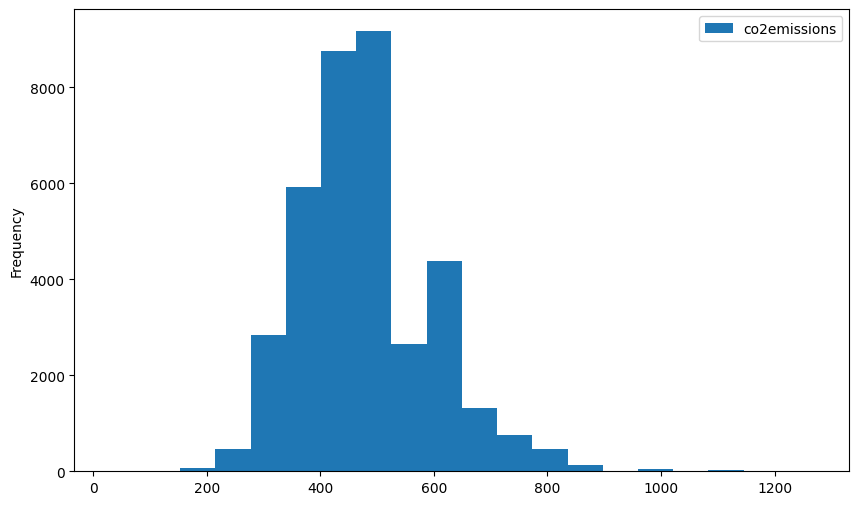

In [36]:
vehicles[['co2emissions']].plot(kind='hist', bins=20, figsize=(10,6))

In [37]:
## Min-Max Normalization
co2emissions_mm = MinMaxScaler().fit_transform(vehicles[['co2emissions']])
co2emissions_mm

array([[0.42435082],
       [0.42435082],
       [0.36738062],
       ...,
       [0.38208199],
       [0.50944265],
       [0.41674344]])

In [38]:
co2emissions_mm1 = pd.DataFrame(co2emissions_mm, columns=[['co2emissions']])
co2emissions_mm1

,co2emissions
0,0.424351
1,0.424351
2,0.367381
3,0.318536
4,0.424351
...,...
36974,0.332911
36975,0.352257
36976,0.382082
36977,0.509443


       co2emissions
count  36979.000000
mean       0.360762
std        0.094949
min        0.000000
25%        0.299056
50%        0.353657
75%        0.424351
max        1.000000


<Axes: ylabel='Frequency'>

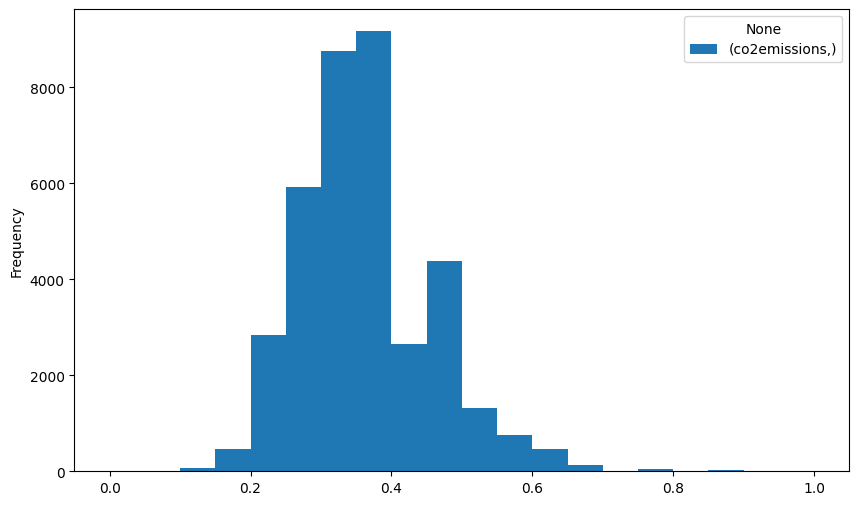

In [39]:
print(co2emissions_mm1.describe())
co2emissions_mm1.plot(kind='hist', bins=20, figsize=(10,6))

In [40]:
## Z Score Normalization
co2emissions_zm = StandardScaler().fit_transform(vehicles[['co2emissions']])
co2emissions_zm = pd.DataFrame(co2emissions_zm, columns=['co2emissions'])
co2emissions_zm.describe()

,co2emissions
count,3.697900e+04
mean,-1.844617e-16
std,1.000014e+00
min,-3.799572e+00
25%,-6.498927e-01
50%,-7.482706e-02
75%,6.697254e-01
max,6.732510e+00


<Axes: ylabel='Frequency'>

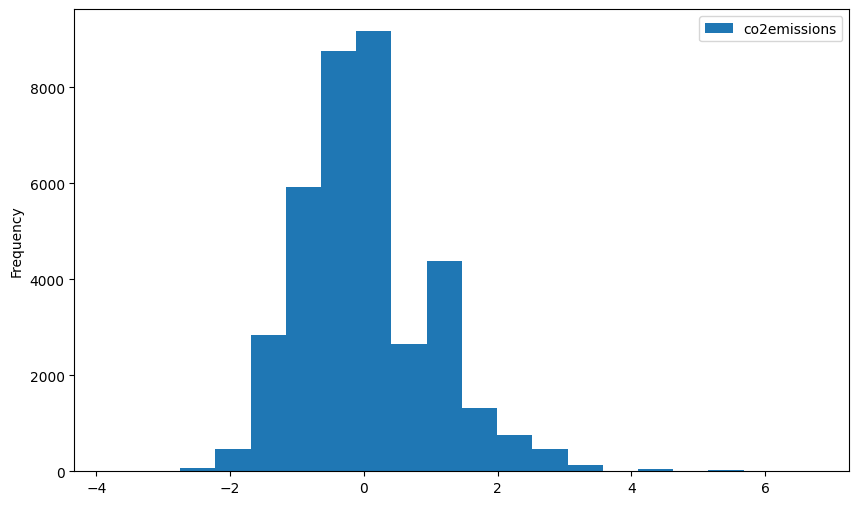

In [41]:
co2emissions_zm.plot(kind='hist', bins=20, figsize=(10,6))

In [42]:
## Sampling Data
vehicles

,citympg,cylinders,displacement,drive,highwaympg,make,model,class,year,transmissiontype,transmissionspeeds,co2emissions
0,14.0,6,4.1,2-Wheel Drive,19.0,Buick,Electra/Park Avenue,Large Cars,1984,Automatic,4,555.437500
1,14.0,8,5.0,2-Wheel Drive,20.0,Buick,Electra/Park Avenue,Large Cars,1984,Automatic,4,555.437500
2,18.0,8,5.7,2-Wheel Drive,26.0,Buick,Electra/Park Avenue,Large Cars,1984,Automatic,4,484.761905
3,21.0,6,4.3,Rear-Wheel Drive,31.0,Cadillac,Fleetwood/DeVille (FWD),Large Cars,1984,Automatic,4,424.166667
4,14.0,8,4.1,Rear-Wheel Drive,19.0,Cadillac,Brougham/DeVille (RWD),Large Cars,1984,Automatic,4,555.437500
...,...,...,...,...,...,...,...,...,...,...,...,...
36974,17.0,8,4.7,Rear-Wheel Drive,25.0,Mercedes-Benz,SL550,Two Seaters,2018,Automatic,9,442.000000
36975,16.0,8,6.2,Rear-Wheel Drive,25.0,Chevrolet,Corvette,Two Seaters,2018,Manual,7,466.000000
36976,15.0,8,6.2,Rear-Wheel Drive,22.0,Chevrolet,Corvette,Two Seaters,2018,Manual,7,503.000000
36977,12.0,12,6.5,Rear-Wheel Drive,16.0,Ferrari,812 Superfast,Two Seaters,2018,Automatic,7,661.000000


In [43]:
response = 'co2emissions'
y = vehicles[[response]]
y.head()

,co2emissions
0,555.437500
1,555.437500
2,484.761905
3,424.166667
4,555.437500


In [44]:
predictors = list(vehicles.columns)
predictors

['citympg',
 'cylinders',
 'displacement',
 'drive',
 'highwaympg',
 'make',
 'model',
 'class',
 'year',
 'transmissiontype',
 'transmissionspeeds',
 'co2emissions']

In [45]:
predictors.remove(response)
predictors

['citympg',
 'cylinders',
 'displacement',
 'drive',
 'highwaympg',
 'make',
 'model',
 'class',
 'year',
 'transmissiontype',
 'transmissionspeeds']

In [46]:
x = vehicles[predictors]
x.head()

,citympg,cylinders,displacement,drive,highwaympg,make,model,class,year,transmissiontype,transmissionspeeds
0,14.0,6,4.1,2-Wheel Drive,19.0,Buick,Electra/Park Avenue,Large Cars,1984,Automatic,4
1,14.0,8,5.0,2-Wheel Drive,20.0,Buick,Electra/Park Avenue,Large Cars,1984,Automatic,4
2,18.0,8,5.7,2-Wheel Drive,26.0,Buick,Electra/Park Avenue,Large Cars,1984,Automatic,4
3,21.0,6,4.3,Rear-Wheel Drive,31.0,Cadillac,Fleetwood/DeVille (FWD),Large Cars,1984,Automatic,4
4,14.0,8,4.1,Rear-Wheel Drive,19.0,Cadillac,Brougham/DeVille (RWD),Large Cars,1984,Automatic,4


In [47]:
## Split Data Using Simple Random Sampling
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [48]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(27734, 11)
(27734, 1)
(9245, 11)
(9245, 1)


In [49]:
x_train, x_test11, y_train, y_test = train_test_split(x, y, test_size=0.4)
x_test11.shape

(14792, 11)

In [50]:
## Splitting Data Using Stratified Random Sampling
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.01, random_state=1234)

In [51]:
x['drive'].value_counts(normalize=True)

drive
Rear-Wheel Drive     0.356797
Front-Wheel Drive    0.353552
All-Wheel Drive      0.239893
4-Wheel Drive        0.036480
2-Wheel Drive        0.013278
Name: proportion, dtype: float64

In [52]:
x_test1['drive'].value_counts(normalize=True)

drive
Front-Wheel Drive    0.364865
Rear-Wheel Drive     0.332432
All-Wheel Drive      0.248649
4-Wheel Drive        0.035135
2-Wheel Drive        0.018919
Name: proportion, dtype: float64

In [53]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.01, random_state=1234, stratify=x['drive'])
x_test1['drive'].value_counts(normalize=True)

drive
Rear-Wheel Drive     0.356757
Front-Wheel Drive    0.354054
All-Wheel Drive      0.240541
4-Wheel Drive        0.035135
2-Wheel Drive        0.013514
Name: proportion, dtype: float64

## Modeling

In [54]:
## Log Regression
bikes = pd.read_csv('/kaggle/input/linkedinpracticeml/bikes.csv')
print(bikes.head())
print(bikes.info())
print(bikes.describe())

   temperature  humidity  windspeed  rentals
0    46.716528  0.815969  13.669663      985
1    48.350239  0.800497  15.199782      801
2    34.212394  0.592097  13.247558     1349
3    34.520000  0.623196  11.687963     1562
4    36.800562  0.624643  13.148281     1600
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  731 non-null    float64
 1   humidity     731 non-null    float64
 2   windspeed    731 non-null    float64
 3   rentals      731 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 23.0 KB
None
       temperature    humidity   windspeed      rentals
count   731.000000  731.000000  731.000000   731.000000
mean     59.509553    0.486937    9.238886  4504.348837
std      15.486114    0.185415    3.379815  1937.211452
min      22.602432    0.000000    0.932208    22.000000
25%      46.117264    0.353548    6.86

<Axes: xlabel='temperature', ylabel='rentals'>

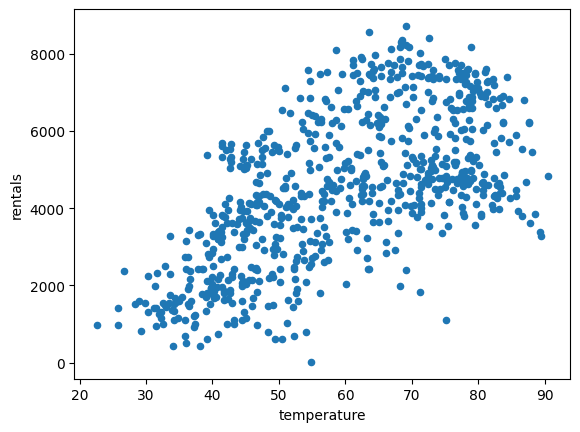

In [55]:
bikes.plot(kind='scatter', x='temperature', y='rentals')

<Axes: xlabel='humidity', ylabel='rentals'>

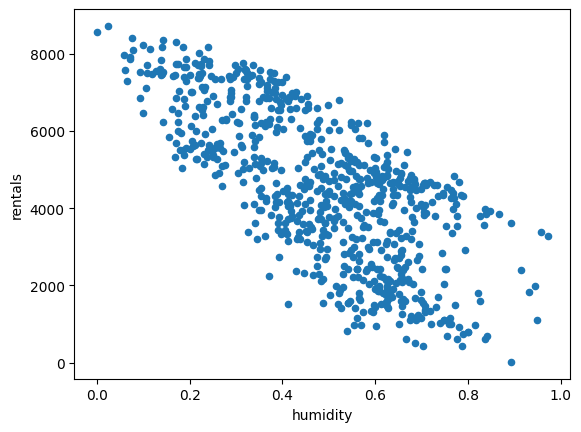

In [56]:
bikes.plot(kind='scatter', x='humidity', y='rentals')

<Axes: xlabel='windspeed', ylabel='rentals'>

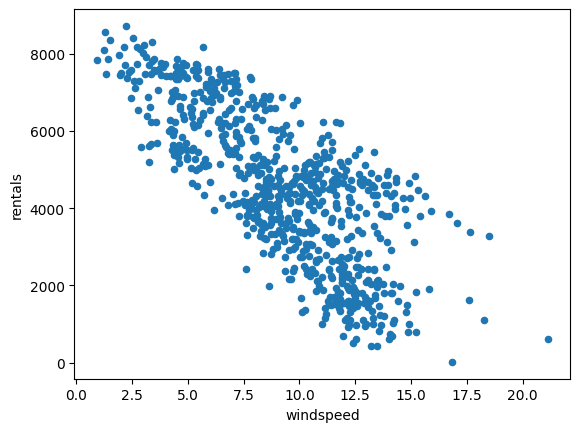

In [57]:
bikes.plot(kind='scatter', x='windspeed', y='rentals')

In [58]:
response1= 'rentals'
y2 = bikes[[response1]]
y2

,rentals
0,985
1,801
2,1349
3,1562
4,1600
...,...
726,2114
727,3095
728,1341
729,1796


In [59]:
predictors1 = list(bikes.columns)
predictors1.remove(response1)
x2 = bikes[predictors1]
x2

,temperature,humidity,windspeed
0,46.716528,0.815969,13.669663
1,48.350239,0.800497,15.199782
2,34.212394,0.592097,13.247558
3,34.520000,0.623196,11.687963
4,36.800562,0.624643,13.148281
...,...,...,...
726,39.102528,0.482493,10.801229
727,39.031972,0.480433,8.996301
728,39.031972,0.717730,11.829425
729,39.243472,0.523039,12.805314


In [60]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, random_state=1234)

In [61]:
model = LinearRegression().fit(x_train2, y_train2)

In [62]:
print(model.intercept_)
print(model.coef_)

[3800.68469948]
[[   80.35314543 -4665.73867387  -196.21650368]]


The equation for the fitted regression line can be written as:
* y = 3800.68 + 80.35(*Temperature*) - 4665.74(*Humidity*) - 196.22(*Windspeed*)

In [63]:
model.score(x_test2, y_test2)

0.9820623857913312

In [64]:
y_pred = model.predict(x_test2)

In [65]:
mean_absolute_error(y_test2, y_pred)

194.31620720519655